<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data12/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
from google.colab.patches import cv2_imshow

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
file_path = '/content/drive/MyDrive/Colab Notebooks/block3.csv'
bitcoin_df = pd.read_csv(file_path, names=['days','price'])
bitcoin_df

,days,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [196]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,days,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [197]:
# object면 시계열로 인식하지 못하기 때문에 바꿔줘야함
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   days    361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [198]:
bitcoin_train_df['days'] = pd.to_datetime(bitcoin_train_df['days'])
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   days    361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
# index를 날짜로 잡아줘야 한다!!!
bitcoin_train_df.set_index('days', inplace=True)
bitcoin_train_df

,price
days,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


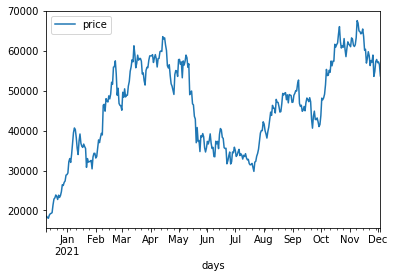

In [200]:
bitcoin_train_df.plot()

In [201]:
# ARIMA 모델 = AR + I + MA 
# AR : AutoRegresion, 이전 데이터들에서 학습한 내용을 가지고 예측
# NA : MovingAverage, 이전 데이터들의 오차를 반영해서 예측
# I : Defference, 차이

In [202]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [203]:
bitcoin_train_df.values[:5]

array([[18318.87],
       [18554.15],
       [18247.76],
       [18029.36],
       [18803.44]])

In [204]:
model = ARIMA(bitcoin_train_df.values, order=(2, 1, 2))
model

In [205]:
model_fit = model.fit(trend='c',full_output=True, disp=True)
model_fit

In [206]:
model_fit.summary()

# P>|z|	를 보면 ar,ma가 0이므로 써도 되겠다. 0.05보다 크다면 쓰면 안됨!!
# 상위 5%에 해당하는지 보는것 95% 이상의 값이 들어왔다면 쓰면 안됨

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.913
Method:                       css-mle   S.D. of innovations           1882.730
Date:                Fri, 10 Dec 2021   AIC                           6463.825
Time:                        03:25:03   BIC                           6487.142
Sample:                             1   HQIC                          6473.096
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7901     99.496      0.802      0.423    -115.219     274.799
ar.L1.D.y      0.9185      0.040     23.091      0.000       0.841       0.996
ar.L2.D.y     -0.9440      0.032    -29.400      0.000      -1.007      -0.881
ma.L1.D.y     -0.9573      0.025    -38.376      0.000      -1.006      -0.908
ma.L2.D.y      0.9855      0.026     38.263      0.000       0.935       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4865           -0.9070j            1.0292           -0.1716
AR.2            0.4865           +0.9070j            1.0292            0.1716
MA.1            0.4857           -0.8825j            1.0073           -0.1699
MA.2            0.4857           +0.8825j            1.0073            0.1699
-----------------------------------------------------------------------------
"""

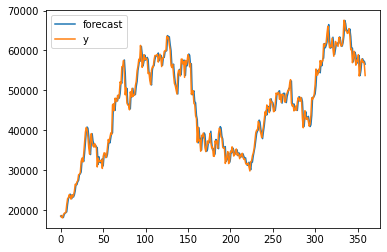

In [207]:
fig = model_fit.plot_predict()

In [208]:
# steps = 5 : 다음 5일
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
        54023.78371803]),
 array([1882.73041766, 2611.43093677, 3183.52110652, 3707.37515166,
        4194.6159268 ]),
 array([[50169.8245822 , 57549.99220464],
        [48773.02804487, 59009.64921322],
        [47624.55892156, 60103.73234715],
        [46625.00329334, 61157.64684219],
        [45802.48757252, 62245.07986355]]))

In [209]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,days,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [210]:
pred_y = forecast_data[0]
pred_y

array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
       54023.78371803])

In [211]:
pred_y = pred_y.tolist()
pred_y

[53859.90839341877,
 53891.33862904949,
 53864.14563435281,
 53891.32506776393,
 54023.78371803221]

In [212]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [213]:
bitcoin_test_df.price.values

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [214]:
test_y = bitcoin_test_df.price.values.tolist()
test_y

[49253.86, 49380.43, 50564.63, 50645.41, 50511.12]

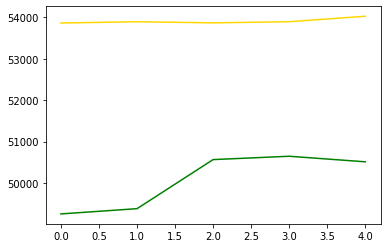

In [215]:
plt.plot(pred_y,color='gold')
plt.plot(test_y,color='green')

In [216]:
forecast_data

(array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
        54023.78371803]),
 array([1882.73041766, 2611.43093677, 3183.52110652, 3707.37515166,
        4194.6159268 ]),
 array([[50169.8245822 , 57549.99220464],
        [48773.02804487, 59009.64921322],
        [47624.55892156, 60103.73234715],
        [46625.00329334, 61157.64684219],
        [45802.48757252, 62245.07986355]]))

In [217]:
forecast_data[2] # 최저[0], 최고[1] -> 그래프로! -----> 2. 데이터셋의 양을 3년 이상으로 늘려보자

array([[50169.8245822 , 57549.99220464],
       [48773.02804487, 59009.64921322],
       [47624.55892156, 60103.73234715],
       [46625.00329334, 61157.64684219],
       [45802.48757252, 62245.07986355]])

In [253]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/market-price.csv', names=['days','price'])
days = df['days'].tolist()[:]
day1 = []
day = []
for i in range(len(days)):
  day1.append(days[i].split(' '))
for j in range(len(day1)):
  day.append(day1[j][0])

In [254]:
df['days'] = day
df = df[1:]
df

,days,price
1,2018-12-11,3472.98
2,2018-12-12,3407.28
3,2018-12-13,3487.73
4,2018-12-14,3308.11
5,2018-12-15,3242.42
...,...,...
1092,2021-12-06,49380.43
1093,2021-12-07,50564.63
1094,2021-12-08,50645.41
1095,2021-12-09,50511.12


In [255]:
train_df = df.iloc[:1091]
train_df

,days,price
1,2018-12-11,3472.98
2,2018-12-12,3407.28
3,2018-12-13,3487.73
4,2018-12-14,3308.11
5,2018-12-15,3242.42
...,...,...
1087,2021-12-01,57025.79
1088,2021-12-02,57229.76
1089,2021-12-03,56508.48
1090,2021-12-04,53713.84


In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 1 to 1091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   days    1091 non-null   object
 1   price   1091 non-null   object
dtypes: object(2)
memory usage: 17.2+ KB


In [257]:
train_df['days'] = pd.to_datetime(train_df['days'])
train_df['price'] = train_df['price'].astype(float)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 1 to 1091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   days    1091 non-null   datetime64[ns]
 1   price   1091 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
train_df.set_index('days', inplace=True)
train_df

,price
days,
2018-12-11,3472.98
2018-12-12,3407.28
2018-12-13,3487.73
2018-12-14,3308.11
2018-12-15,3242.42
...,...
2021-12-01,57025.79
2021-12-02,57229.76
2021-12-03,56508.48


In [259]:
model3 = ARIMA(train_df.values, order=(2, 1, 2))
model3

In [260]:
model3_fit = model3.fit(trend='c',full_output=True, disp=True)
model3_fit

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [261]:
model3_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1090
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9209.892
Method:                       css-mle   S.D. of innovations           1128.035
Date:                Fri, 10 Dec 2021   AIC                          18431.785
Time:                        03:30:25   BIC                          18461.748
Sample:                             1   HQIC                         18443.125
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9973     33.988      1.236      0.217     -24.618     108.613
ar.L1.D.y      0.8432      0.007    122.676      0.000       0.830       0.857
ar.L2.D.y     -0.9790      0.008   -116.250      0.000      -0.995      -0.962
ma.L1.D.y     -0.8702      0.004   -231.484      0.000      -0.878      -0.863
ma.L2.D.y      1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4306           -0.9144j            1.0107           -0.1799
AR.2            0.4306           +0.9144j            1.0107            0.1799
MA.1            0.4351           -0.9004j            1.0000           -0.1784
MA.2            0.4351           +0.9004j            1.0000            0.1784
-----------------------------------------------------------------------------
"""

In [262]:
forecast_data = model3_fit.forecast(steps=5)
forecast_data

(array([49351.46028791, 49108.68415616, 48856.14015305, 48928.57238123,
        49284.5727998 ]),
 array([1128.03543391, 1573.88478024, 1917.67828481, 2222.7064436 ,
        2502.34267867]),
 array([[47140.55146417, 51562.36911165],
        [46023.92667108, 52193.44164124],
        [45097.55978089, 52614.72052522],
        [44572.14780357, 53284.99695888],
        [44380.07127263, 54189.07432697]]))

In [263]:
test_df = df[1091:]
test_df

,days,price
1092,2021-12-06,49380.43
1093,2021-12-07,50564.63
1094,2021-12-08,50645.41
1095,2021-12-09,50511.12
1096,2021-12-10,47659.68


In [264]:
pred_y = forecast_data[0]
pred_y

array([49351.46028791, 49108.68415616, 48856.14015305, 48928.57238123,
       49284.5727998 ])

In [265]:
pred_y = pred_y.tolist()
pred_y

[49351.4602879105,
 49108.68415616176,
 48856.140153054264,
 48928.572381226055,
 49284.572799801]

In [274]:
test_df['price'] = test_df['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [275]:
test_y = test_df.price.values.tolist()
test_y

[49380.43, 50564.63, 50645.41, 50511.12, 47659.68]

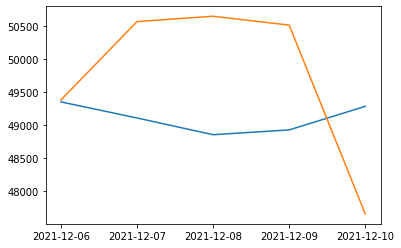

In [277]:
plt.plot(test_df['days'],pred_y)
plt.plot(test_df['days'],test_y)

In [241]:
# Additive 모델 = ARIMA + 기간의 trend : facebook

In [278]:
from fbprophet import Prophet

In [279]:
bitcoin_df2 = pd.read_csv(file_path, names=['ds','y'])

In [280]:
bitcoin_df2

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [281]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

In [282]:
prophet.fit(bitcoin_df2)

In [283]:
future_data = prophet.make_future_dataframe(periods=5,freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-12-09,2224.520601,16267.221953,20564.744078,2224.520601,2224.520601,10.589405,10.589405,10.589405,7.270101,7.270101,7.270101,-0.042453,-0.042453,-0.042453,-3.276850,-3.276850,-3.276850,0.0,0.0,0.0,18397.010913
1,2020-12-10,2245.025866,16432.938356,20898.692561,2245.025866,2245.025866,10.589405,10.589405,10.589405,7.273211,7.273211,7.273211,0.017467,0.017467,0.017467,-3.333660,-3.333660,-3.333660,0.0,0.0,0.0,18573.573214
2,2020-12-11,2265.531130,16293.698995,20644.022921,2265.531130,2265.531130,10.589405,10.589405,10.589405,7.177258,7.177258,7.177258,-0.044290,-0.044290,-0.044290,-3.367857,-3.367857,-3.367857,0.0,0.0,0.0,18525.832046
3,2020-12-12,2286.036394,16657.729890,21101.485434,2286.036394,2286.036394,10.589405,10.589405,10.589405,7.232412,7.232412,7.232412,0.021332,0.021332,0.021332,-3.378325,-3.378325,-3.378325,0.0,0.0,0.0,18819.592860
4,2020-12-13,2306.541659,16845.567619,21222.092171,2306.541659,2306.541659,10.589405,10.589405,10.589405,7.243287,7.243287,7.243287,0.018141,0.018141,0.018141,-3.364259,-3.364259,-3.364259,0.0,0.0,0.0,19013.485085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2021-12-10,6142.437574,48312.842123,52844.456302,6142.437574,6142.437574,10.589405,10.589405,10.589405,7.223587,7.223587,7.223587,-0.044290,-0.044290,-0.044290,-3.321528,-3.321528,-3.321528,0.0,0.0,0.0,50512.869646
367,2021-12-11,6183.302817,48691.484435,53196.562850,6183.302817,6183.302817,10.589405,10.589405,10.589405,7.249243,7.249243,7.249243,0.021332,0.021332,0.021332,-3.361494,-3.361494,-3.361494,0.0,0.0,0.0,51007.566222
368,2021-12-12,6224.168061,48860.392049,53685.220554,6224.168061,6224.168061,10.589405,10.589405,10.589405,7.229564,7.229564,7.229564,0.018141,0.018141,0.018141,-3.377982,-3.377982,-3.377982,0.0,0.0,0.0,51222.189345
369,2021-12-13,6265.033305,49089.901801,53835.512721,6248.727784,6275.204966,10.589405,10.589405,10.589405,7.229249,7.229249,7.229249,0.009951,0.009951,0.009951,-3.370107,-3.370107,-3.370107,0.0,0.0,0.0,51556.521793


In [284]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48312.842123,52844.456302
367,2021-12-11,51007.566222,48691.484435,53196.562850
368,2021-12-12,51222.189345,48860.392049,53685.220554
369,2021-12-13,51556.521793,49089.901801,53835.512721
370,2021-12-14,52161.984803,49532.347104,54831.879523


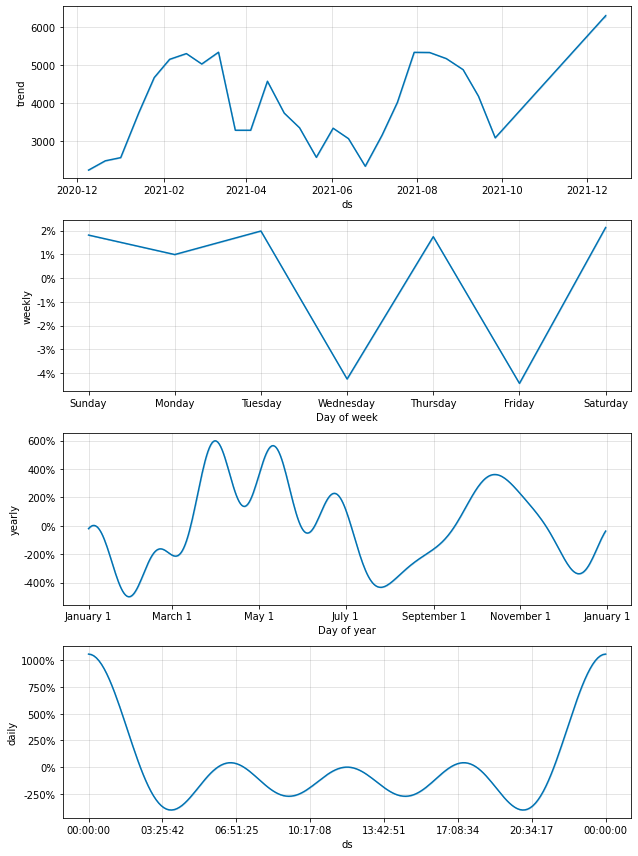

In [285]:
fig2 = prophet.plot_components(forecast_data)